In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [123]:
# import the test and prediction data 
preds = pd.read_csv('predictions_MLP.csv', index_col=0)   

In [124]:
preds

Labels  Predictions
Galaxy Index                     
78744              1            1
64869              1            0
69336              2            1
31965              2            2
53078              2            2
...              ...          ...
88912              1            2
81499              3            2
9206               3            3
73243              1            1
39667              2            2

[15701 rows x 2 columns]

In [125]:
# import flagged galaxies

flagged = pd.read_csv('flagged.csv', index_col=0)

In [126]:
# add column of 1s to flagged galaxies
flagged['flagged'] = 1

In [127]:
flagged

propflaggeddiff  totalneighs  flagged
5                    9           26        1
18                   3           26        1
25                   1           26        1
35                  12           26        1
37                   2           26        1
...                ...          ...      ...
97215                7           26        1
97218                8           26        1
97222               14           26        1
97223               12           26        1
97230                1           26        1

[20975 rows x 3 columns]

In [128]:
# merge the two dataframes on the galaxy ID and for galaxies unflagged, put a None in the propflaggeddiff and totalneighs columns

merged = pd.merge(preds, flagged, how='left', left_index=True, right_index=True)

In [129]:
merged

Labels  Predictions  propflaggeddiff  totalneighs  flagged
Galaxy Index                                                            
78744              1            1              NaN          NaN      NaN
64869              1            0              NaN          NaN      NaN
69336              2            1              NaN          NaN      NaN
31965              2            2              NaN          NaN      NaN
53078              2            2              1.0         26.0      1.0
...              ...          ...              ...          ...      ...
88912              1            2              NaN          NaN      NaN
81499              3            2              3.0         26.0      1.0
9206               3            3              NaN          NaN      NaN
73243              1            1              NaN          NaN      NaN
39667              2            2              NaN          NaN      NaN

[15701 rows x 5 columns]

In [130]:
# remove flagged galaxies from the dataframe

pure = merged[merged['flagged'] != 1]
pure.drop(['flagged', 'propflaggeddiff', 'totalneighs'], axis=1, inplace=True)

/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_2097/194561993.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
pure

Labels  Predictions
Galaxy Index                     
78744              1            1
64869              1            0
69336              2            1
31965              2            2
19241              3            3
...              ...          ...
22586              3            2
88912              1            2
9206               3            3
73243              1            1
39667              2            2

[12328 rows x 2 columns]

In [132]:
# accuracy of pure and predictions

accuracy_pure = (pure['Labels'] == pure['Predictions']).sum() / len(pure)
accuracy_full = (merged['Labels'] == merged['Predictions']).sum() / len(merged)
accuracy_pure*100, accuracy_full*100

(72.58273848150552, 68.79179670084707)

In [133]:
cm_pure = confusion_matrix(pure['Labels'], pure['Predictions'])
cm_full = confusion_matrix(merged['Labels'], merged['Predictions'])

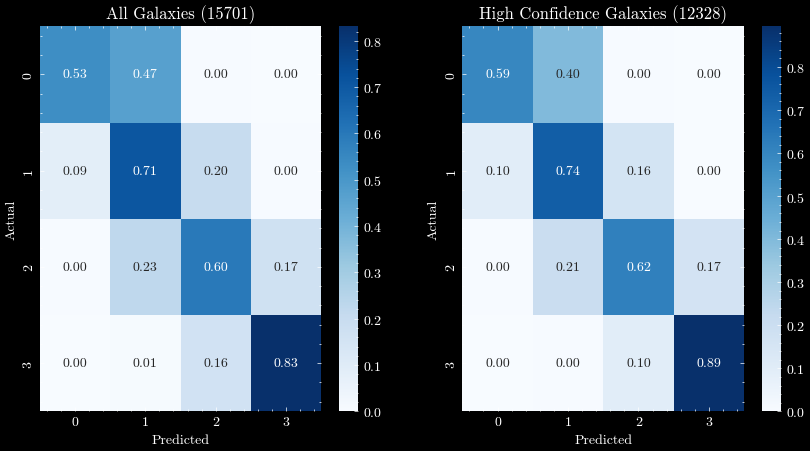

In [134]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
cm_pure = cm_pure.astype('float') / cm_pure.sum(axis=1)[:, np.newaxis]
cm_full = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_full, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
sns.heatmap(cm_pure, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
l1=len(merged['Labels'])
l2=len(pure['Labels'])
ax1.set_title(f'All Galaxies ({l1})')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'High Confidence Galaxies ({l2})')
fig.savefig('cm_delaunay.pdf')

In [135]:
# for each of 0, 1, 2, 3 find the TN, FP, FN, TP and create a new table for each class

# class 0
class0 = merged[merged['Labels'] == 0]
flagged0 = class0[class0['flagged'] == 1]

In [136]:
class0

Labels  Predictions  propflaggeddiff  totalneighs  flagged
Galaxy Index                                                            
65079              0            0             12.0         26.0      1.0
70913              0            1             10.0         26.0      1.0
94999              0            1              9.0         26.0      1.0
82331              0            1             11.0         26.0      1.0
93800              0            1              NaN          NaN      NaN
...              ...          ...              ...          ...      ...
84716              0            0              NaN          NaN      NaN
79961              0            1              8.0         26.0      1.0
88514              0            0              NaN          NaN      NaN
79620              0            0              NaN          NaN      NaN
82922              0            0              NaN          NaN      NaN

[306 rows x 5 columns]

In [137]:
flagged0

Labels  Predictions  propflaggeddiff  totalneighs  flagged
Galaxy Index                                                            
65079              0            0             12.0         26.0      1.0
70913              0            1             10.0         26.0      1.0
94999              0            1              9.0         26.0      1.0
82331              0            1             11.0         26.0      1.0
61609              0            0              5.0         26.0      1.0
...              ...          ...              ...          ...      ...
74164              0            1              3.0         26.0      1.0
94316              0            0              3.0         26.0      1.0
77993              0            1             12.0         26.0      1.0
67608              0            1              5.0         26.0      1.0
79961              0            1              8.0         26.0      1.0

[79 rows x 5 columns]

Now a more complicated confidence measuring scheme

In [138]:
from Utilities import cat

In [139]:
testcat = cat(path=r'/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 1/Illustris/TNG300-1', snapno=99, masscut=1e10)

There are 97233 subhalos with stellar mass greater than 0.6774.
Mean Subhalo Separation: 2.26 Mpc
Number Density of Subhalos: 0.0036 Mpc^-3


In [140]:
testcat.subhalo_delauany_network(xyzplot=False)

Figure saved as TNG300-1_z=0_{self.filetype}_Subhalos.pdf


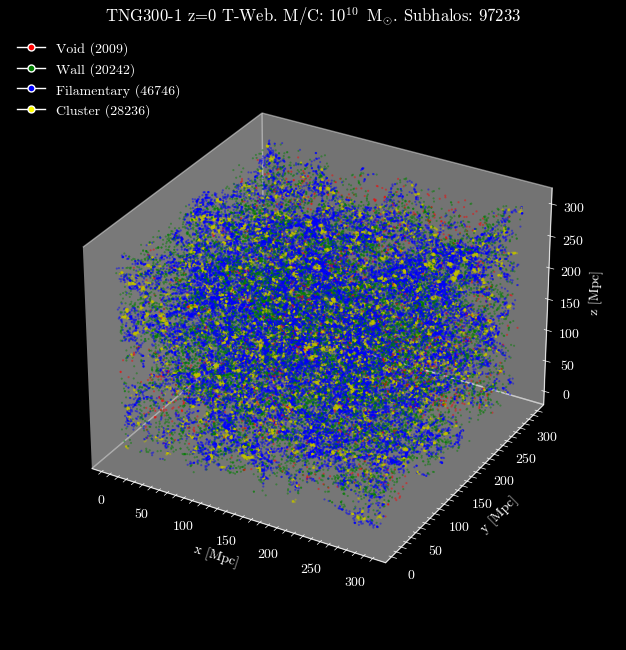

In [141]:
testcat.cweb_classify()

In [142]:
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt

In [143]:
# Variable to convert smoothing scale from Mpc/h to Mpc

smoothing_scale = 205/512/testcat.hub #0.5862234626647145 #2.0/testcat.hub
print(f'Smoothing scale: {smoothing_scale} Mpc')

Smoothing scale: 0.5910697150870977 Mpc


In [144]:
smoothing_scale

0.5910697150870977

In [145]:
stars = (testcat.object['subhalos']['SubhaloMassType'][:,4]) #stellar mass of subhalos
mc = testcat.masscut*testcat.hub/1e10 #mass cut for subhalos
stars_indices = np.where(stars>=mc)[0] #indices of subhalos with stellar mass greater than masscut
print(f'Number of galaxies: {len(stars_indices)}')
print(f'Masscut in 1e10 Msun: {mc}')

Number of galaxies: 97233
Masscut in 1e10 Msun: 0.6774


In [146]:
x = (testcat.x[stars_indices])
y = (testcat.y[stars_indices])
z = (testcat.z[stars_indices])

N = 1000 # number of realisations
# Make sure sigma is equal to the smoothing scale of the CW classification algorithm {TWEB, NEXUS+}
noise_x = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc # mean 0, std smoothing_scale*1e3 kpc, and N realisations for each galaxy
noise_y = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc
noise_z = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc

noisy_x = x[:, np.newaxis] + noise_x
noisy_y = y[:, np.newaxis] + noise_y
noisy_z = z[:, np.newaxis] + noise_z

noisy_xpix = (noisy_x/testcat.dx).astype(int)
noisy_ypix = (noisy_y/testcat.dx).astype(int)
noisy_zpix = (noisy_z/testcat.dx).astype(int)

noisy_xpix = np.clip(noisy_xpix, 0, testcat.cwebdata.shape[0] - 1)
noisy_ypix = np.clip(noisy_ypix, 0, testcat.cwebdata.shape[1] - 1)
noisy_zpix = np.clip(noisy_zpix, 0, testcat.cwebdata.shape[2] - 1)

In [147]:
# trying alternative noise generation by moving grid instead
noise_gridx = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc # mean 0, std smoothing_scale*1e3 kpc, and N realisations for the whole grid. we add this noise to the coordinates of all galaxies so the distances between galaxies remain the same
noise_gridy = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc
noise_gridz = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc

noisy_x2 = x[:, np.newaxis] + noise_gridx
noisy_y2 = y[:, np.newaxis] + noise_gridy
noisy_z2 = z[:, np.newaxis] + noise_gridz

noisy_xpix2 = (noisy_x2/testcat.dx).astype(int)
noisy_ypix2 = (noisy_y2/testcat.dx).astype(int)
noisy_zpix2 = (noisy_z2/testcat.dx).astype(int)

noisy_xpix2 = np.clip(noisy_xpix2, 0, testcat.cwebdata.shape[0] - 1)
noisy_ypix2 = np.clip(noisy_ypix2, 0, testcat.cwebdata.shape[1] - 1)
noisy_zpix2 = np.clip(noisy_zpix2, 0, testcat.cwebdata.shape[2] - 1)

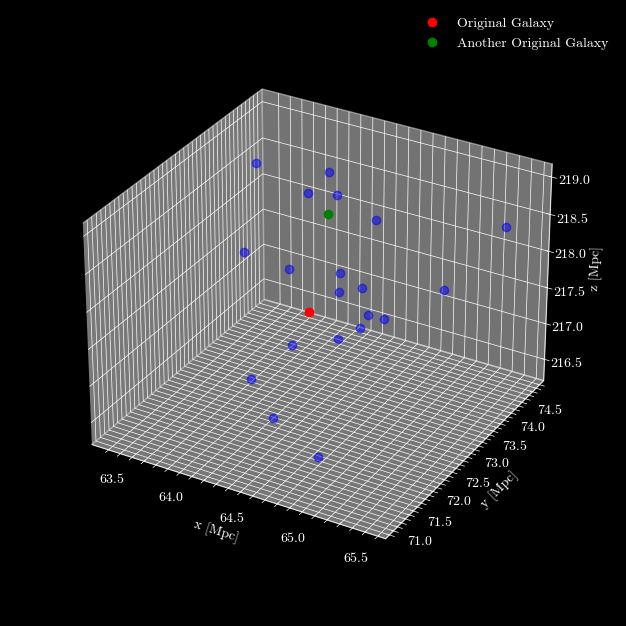

In [148]:
# plot test galaxy coordinates and realisations of the test galaxy coordinates
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
test_galaxy = 0 # galaxy index to plot
another_test_galaxy = 100
ax.plot(x[test_galaxy].to('Mpc'), y[test_galaxy].to('Mpc'), z[test_galaxy].to('Mpc'), 'o', color='red', label='Original Galaxy')
ax.plot(x[another_test_galaxy].to('Mpc'), y[another_test_galaxy].to('Mpc'), z[another_test_galaxy].to('Mpc'), 'o', color='green', label='Another Original Galaxy')

for i in range(10):
    ax.plot(noisy_x[test_galaxy, i].to('Mpc'), noisy_y[test_galaxy, i].to('Mpc'), noisy_z[test_galaxy, i].to('Mpc'), 'o', color='blue', alpha=0.5)
    ax.plot(noisy_x[another_test_galaxy, i].to('Mpc'), noisy_y[another_test_galaxy, i].to('Mpc'), noisy_z[another_test_galaxy, i].to('Mpc'), 'o', color='blue', alpha=0.5)


ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
# ax.set_xlim(0, 300)
# ax.set_ylim(0, 300)
# ax.set_zlim(0, 300)
ax.set_box_aspect(None, zoom=0.85)
ax.legend()
plt.show()

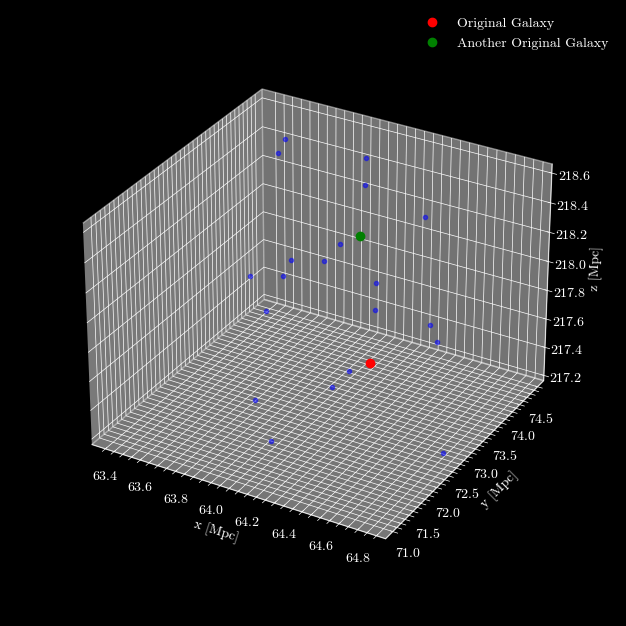

In [149]:
# plot test galaxy coordinates and realisations of the test galaxy coordinates with alternative noise generation
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
test_galaxy = 0 # galaxy index to plot
another_test_galaxy = 100
ax.plot(x[test_galaxy].to('Mpc'), y[test_galaxy].to('Mpc'), z[test_galaxy].to('Mpc'), 'o', color='red', label='Original Galaxy')
ax.plot(x[another_test_galaxy].to('Mpc'), y[another_test_galaxy].to('Mpc'), z[another_test_galaxy].to('Mpc'), 'o', color='green', label='Another Original Galaxy')
for i in range(10):
    ax.plot(noisy_x2[test_galaxy, i].to('Mpc'), noisy_y2[test_galaxy, i].to('Mpc'), noisy_z2[test_galaxy, i].to('Mpc'), '.', color='blue', alpha=0.5)
    ax.plot(noisy_x2[another_test_galaxy, i].to('Mpc'), noisy_y2[another_test_galaxy, i].to('Mpc'), noisy_z2[another_test_galaxy, i].to('Mpc'), '.', color='blue', alpha=0.5)

ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
# ax.set_xlim(0, 300)
# ax.set_ylim(0, 300)
# ax.set_zlim(0, 300)
ax.set_box_aspect(None, zoom=0.85)
ax.legend()
plt.show()

In [150]:
cweb_noisy = testcat.cwebdata[noisy_xpix, noisy_ypix, noisy_zpix] #cweb classification of N noisy realisations of each galaxy. Row = a given galaxy. column =  one realisation
cweb_noisy2 = testcat.cwebdata[noisy_xpix2, noisy_ypix2, noisy_zpix2] #cweb classification of N noisy alt realisations of each galaxy. Row = a given galaxy. column =  one realisation

In [151]:
cweb_count = {}
for index, value in enumerate(cweb_noisy):
    unique_values, counts = np.unique(value, return_counts=True)
    cweb_count[index] = dict(zip(unique_values, counts))


cweb_count2 = {}
for index, value in enumerate(cweb_noisy2):
    unique_values, counts = np.unique(value, return_counts=True)
    cweb_count2[index] = dict(zip(unique_values, counts))

In [152]:
# shifted_galaxies = {galaxy:  value for galaxy, value in cweb_count.items() if len(value) > 1} # galaxies with more than one classification
shifted_galaxies = {galaxy:  value for galaxy, value in cweb_count.items()} # galaxies with more than one classification. modifying to include all galaxies. unshifted galaxies will have only one classification
shifted_galaxies2 = {galaxy: value for galaxy, value in cweb_count2.items()} # galaxies with more than one classification. modifying to include all galaxies. unshifted galaxies will have only one classification

In [153]:
len(shifted_galaxies2)

97233

Std of gaussian noise (kpc) - 100 realisations original only not alternative

1, 97


2, 174


3, 270


5, 431


10, 888


1e3, 63618


10e3, 97233 (all galaxies become shifted with a std of 10Mpc)


smoothing_scale, 97048 (Vast majority of galaxies with an std noise of 2.9 Mpc are shifted into a new CW environment)

In [154]:
shifted_galaxies

{0: {3.0: 1000},
 1: {3.0: 1000},
 2: {3.0: 1000},
 3: {3.0: 1000},
 4: {3.0: 1000},
 5: {2.0: 212, 3.0: 788},
 6: {3.0: 1000},
 7: {2.0: 41, 3.0: 959},
 8: {2.0: 1, 3.0: 999},
 9: {2.0: 1, 3.0: 999},
 10: {3.0: 1000},
 11: {3.0: 1000},
 12: {2.0: 18, 3.0: 982},
 13: {2.0: 29, 3.0: 971},
 14: {3.0: 1000},
 15: {3.0: 1000},
 16: {2.0: 58, 3.0: 942},
 17: {3.0: 1000},
 18: {2.0: 840, 3.0: 160},
 19: {3.0: 1000},
 20: {3.0: 1000},
 21: {3.0: 1000},
 22: {2.0: 1, 3.0: 999},
 23: {3.0: 1000},
 24: {3.0: 1000},
 25: {2.0: 38, 3.0: 962},
 26: {2.0: 1, 3.0: 999},
 27: {3.0: 1000},
 28: {3.0: 1000},
 29: {3.0: 1000},
 30: {3.0: 1000},
 31: {3.0: 1000},
 32: {3.0: 1000},
 33: {3.0: 1000},
 34: {3.0: 1000},
 35: {2.0: 394, 3.0: 606},
 36: {2.0: 10, 3.0: 990},
 37: {2.0: 139, 3.0: 861},
 38: {2.0: 3, 3.0: 997},
 39: {2.0: 194, 3.0: 806},
 40: {2.0: 1, 3.0: 999},
 41: {3.0: 1000},
 42: {3.0: 1000},
 43: {3.0: 1000},
 44: {3.0: 1000},
 45: {2.0: 3, 3.0: 997},
 46: {3.0: 1000},
 47: {3.0: 1000},
 48:

In [155]:
shifted_galaxies_probs = {}
shifted_galaxies_values = {}
for galaxy in range(len(x)):
    probs = {env: 0.0 for env in range(4)}  # Assuming 4 CW environments (0, 1, 2, 3)
    vals = {env: 0 for env in range(4)}
    if galaxy in shifted_galaxies:
        env_counts = shifted_galaxies[galaxy]
        for env, count in env_counts.items():
            probs[env] = count/N
            vals[env] = count

    shifted_galaxies_probs[galaxy] = probs
    shifted_galaxies_values[galaxy] = vals


shifted_galaxies_probs2 = {}
shifted_galaxies_values2 = {}
for galaxy in range(len(x)):
    probs = {env: 0.0 for env in range(4)}  # Assuming 4 CW environments (0, 1, 2, 3)
    vals = {env: 0 for env in range(4)}
    if galaxy in shifted_galaxies2:
        env_counts = shifted_galaxies2[galaxy]
        for env, count in env_counts.items():
            probs[env] = count/N
            vals[env] = count

    shifted_galaxies_probs2[galaxy] = probs
    shifted_galaxies_values2[galaxy] = vals

In [156]:
shifted_galaxies_values

{0: {0: 0, 1: 0, 2: 0, 3: 1000},
 1: {0: 0, 1: 0, 2: 0, 3: 1000},
 2: {0: 0, 1: 0, 2: 0, 3: 1000},
 3: {0: 0, 1: 0, 2: 0, 3: 1000},
 4: {0: 0, 1: 0, 2: 0, 3: 1000},
 5: {0: 0, 1: 0, 2: 212, 3: 788},
 6: {0: 0, 1: 0, 2: 0, 3: 1000},
 7: {0: 0, 1: 0, 2: 41, 3: 959},
 8: {0: 0, 1: 0, 2: 1, 3: 999},
 9: {0: 0, 1: 0, 2: 1, 3: 999},
 10: {0: 0, 1: 0, 2: 0, 3: 1000},
 11: {0: 0, 1: 0, 2: 0, 3: 1000},
 12: {0: 0, 1: 0, 2: 18, 3: 982},
 13: {0: 0, 1: 0, 2: 29, 3: 971},
 14: {0: 0, 1: 0, 2: 0, 3: 1000},
 15: {0: 0, 1: 0, 2: 0, 3: 1000},
 16: {0: 0, 1: 0, 2: 58, 3: 942},
 17: {0: 0, 1: 0, 2: 0, 3: 1000},
 18: {0: 0, 1: 0, 2: 840, 3: 160},
 19: {0: 0, 1: 0, 2: 0, 3: 1000},
 20: {0: 0, 1: 0, 2: 0, 3: 1000},
 21: {0: 0, 1: 0, 2: 0, 3: 1000},
 22: {0: 0, 1: 0, 2: 1, 3: 999},
 23: {0: 0, 1: 0, 2: 0, 3: 1000},
 24: {0: 0, 1: 0, 2: 0, 3: 1000},
 25: {0: 0, 1: 0, 2: 38, 3: 962},
 26: {0: 0, 1: 0, 2: 1, 3: 999},
 27: {0: 0, 1: 0, 2: 0, 3: 1000},
 28: {0: 0, 1: 0, 2: 0, 3: 1000},
 29: {0: 0, 1: 0, 2: 0, 3:

In [157]:
# convert to dataframe and add galaxy ID as index and testcat.cweb as end column labelled 'original classification'
shifted_galaxies_probstab = pd.DataFrame(shifted_galaxies_probs).T
shifted_galaxies_probstab['Target'] = testcat.cweb
shifted_galaxies_probstab.index.name = 'Galaxy Index'
shifted_galaxies_probstab

shifted_galaxies_valuestab = pd.DataFrame(shifted_galaxies_values).T
shifted_galaxies_valuestab['Target'] = testcat.cweb
shifted_galaxies_valuestab.index.name = 'Galaxy Index'
shifted_galaxies_valuestab

shifted_galaxies_probstab2 = pd.DataFrame(shifted_galaxies_probs2).T
shifted_galaxies_probstab2['Target'] = testcat.cweb
shifted_galaxies_probstab2.index.name = 'Galaxy Index'
shifted_galaxies_probstab2

shifted_galaxies_valuestab2 = pd.DataFrame(shifted_galaxies_values2).T
shifted_galaxies_valuestab2['Target'] = testcat.cweb
shifted_galaxies_valuestab2.index.name = 'Galaxy Index'
shifted_galaxies_valuestab2

0  1     2     3  Target
Galaxy Index                          
0             0  0     0  1000     3.0
1             0  0     0  1000     3.0
2             0  0     0  1000     3.0
3             0  0     0  1000     3.0
4             0  0     0  1000     3.0
...          .. ..   ...   ...     ...
97228         0  0     0  1000     3.0
97229         0  0   990    10     2.0
97230         0  0   893   107     2.0
97231         0  0  1000     0     2.0
97232         0  0   995     5     2.0

[97233 rows x 5 columns]

In [158]:
shifted_galaxies_probstab

0    1      2      3  Target
Galaxy Index                                
0             0.0  0.0  0.000  1.000     3.0
1             0.0  0.0  0.000  1.000     3.0
2             0.0  0.0  0.000  1.000     3.0
3             0.0  0.0  0.000  1.000     3.0
4             0.0  0.0  0.000  1.000     3.0
...           ...  ...    ...    ...     ...
97228         0.0  0.0  0.000  1.000     3.0
97229         0.0  0.0  0.983  0.017     2.0
97230         0.0  0.0  0.885  0.115     2.0
97231         0.0  0.0  1.000  0.000     2.0
97232         0.0  0.0  0.993  0.007     2.0

[97233 rows x 5 columns]

In [159]:
shifted_galaxies_probstab.to_csv('shifted_galaxies_probs.csv', index=True, header=True)

/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_2097/3529419206.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_2097/3529419206.py:6: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



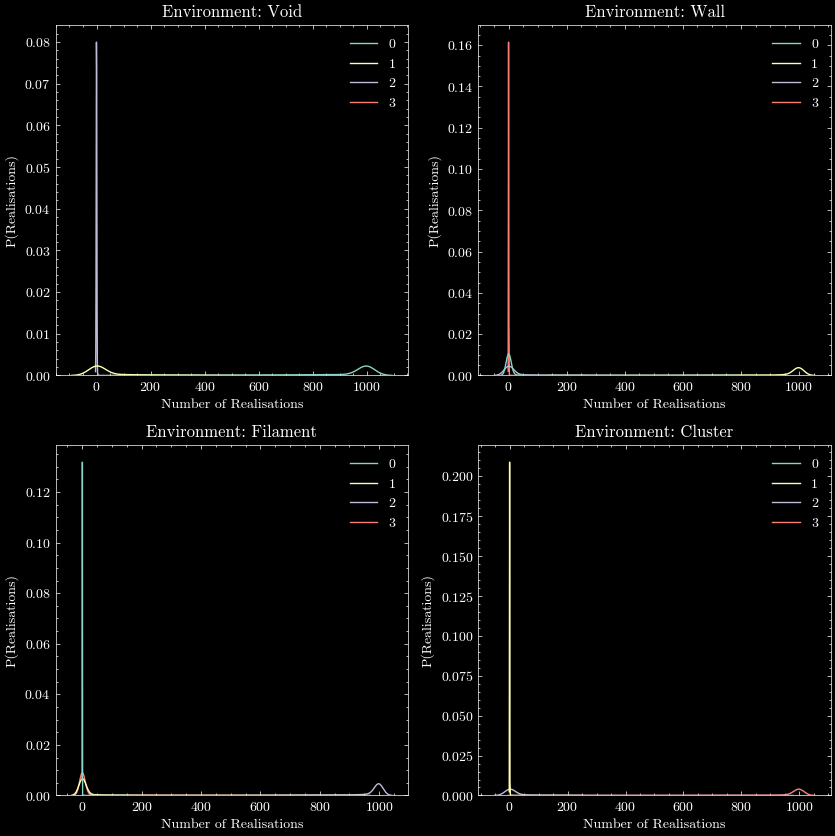

In [160]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0].drop('Target', axis=1), ax=ax[0, 0])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1].drop('Target', axis=1), ax=ax[0, 1])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2].drop('Target', axis=1), ax=ax[1, 0])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3].drop('Target', axis=1), ax=ax[1, 1])#, stat='density')

envs = ['Void', 'Wall', 'Filament', 'Cluster']

for i in range(4):
    ax[i//2,i%2].set_title(f'Environment: {envs[i]}')
    ax[i//2,i%2].set_xlabel('Number of Realisations')
    ax[i//2,i%2].set_ylabel('P(Realisations)')


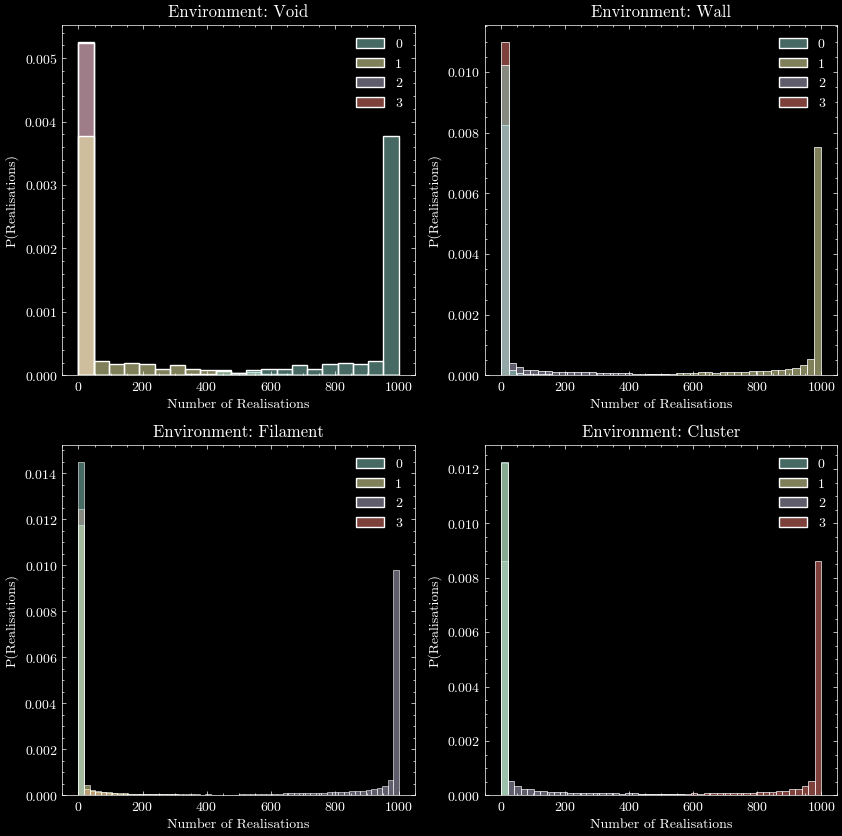

In [161]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0].drop('Target', axis=1), ax=ax[0, 0], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1].drop('Target', axis=1), ax=ax[0, 1], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2].drop('Target', axis=1), ax=ax[1, 0], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3].drop('Target', axis=1), ax=ax[1, 1], stat='density')

envs = ['Void', 'Wall', 'Filament', 'Cluster']

for i in range(4):
    ax[i//2,i%2].set_title(f'Environment: {envs[i]}')
    ax[i//2,i%2].set_xlabel('Number of Realisations')
    ax[i//2,i%2].set_ylabel('P(Realisations)')

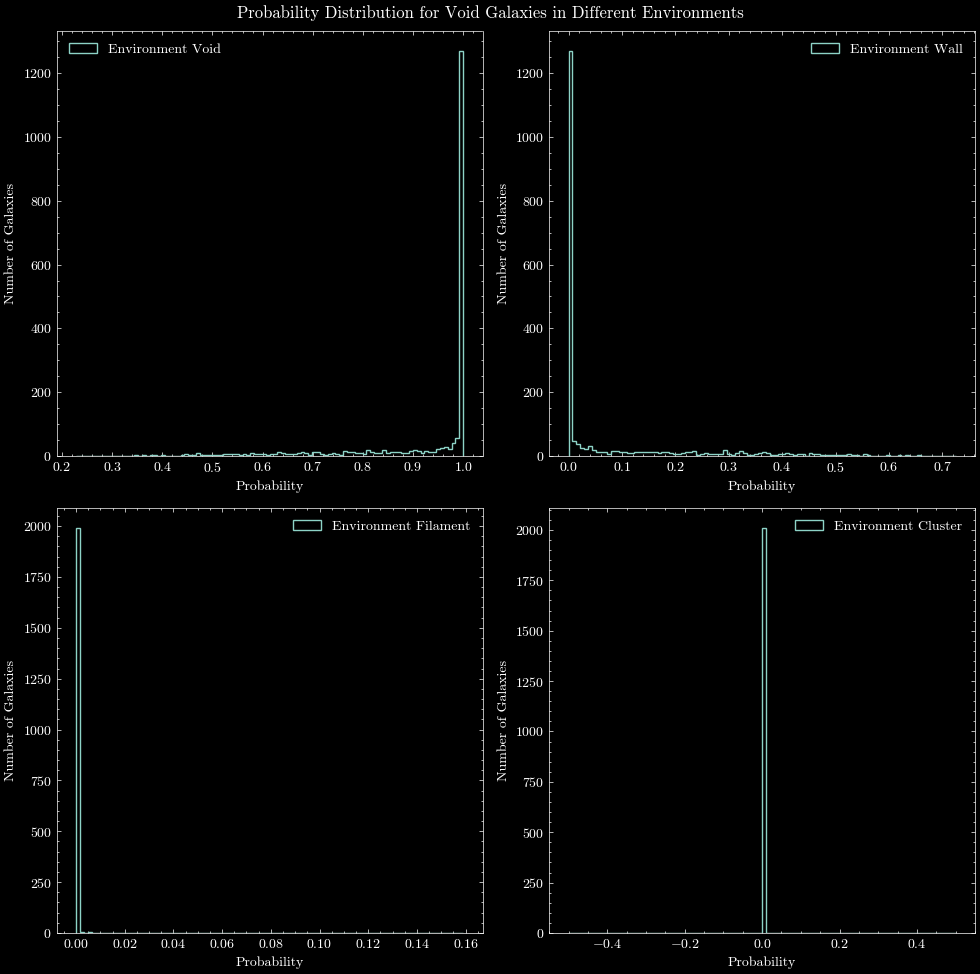

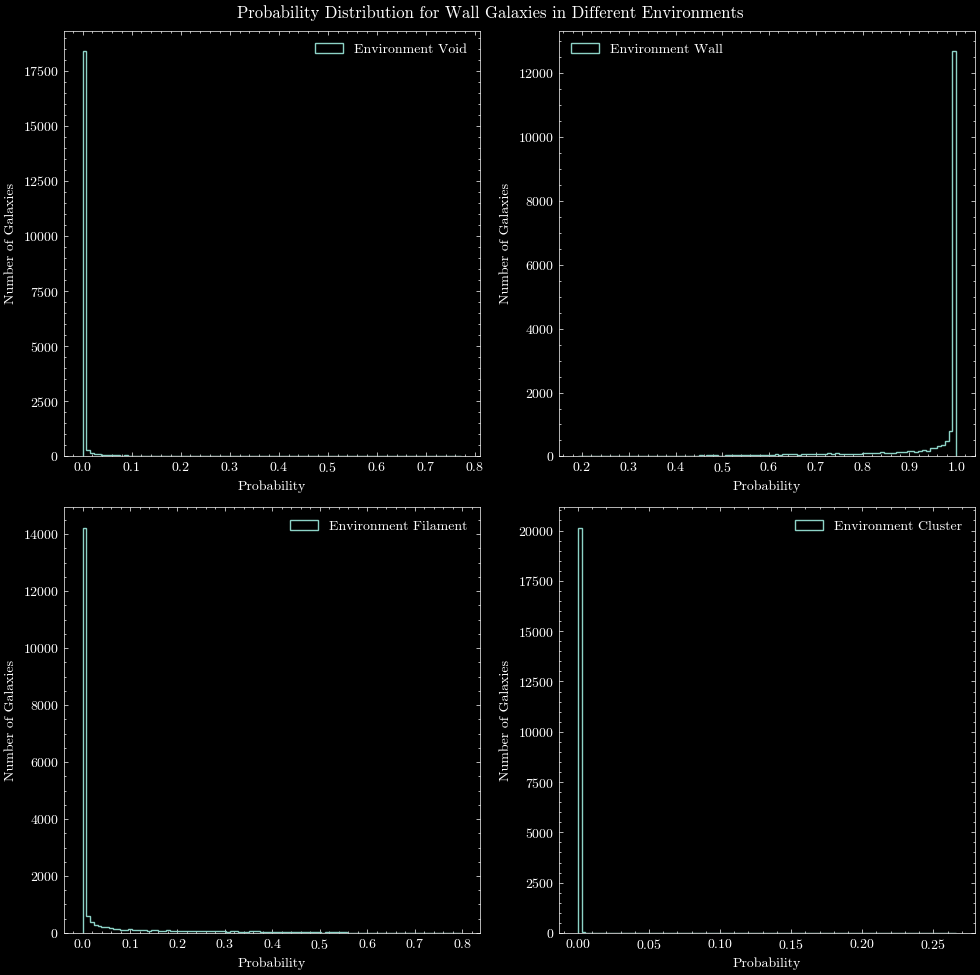

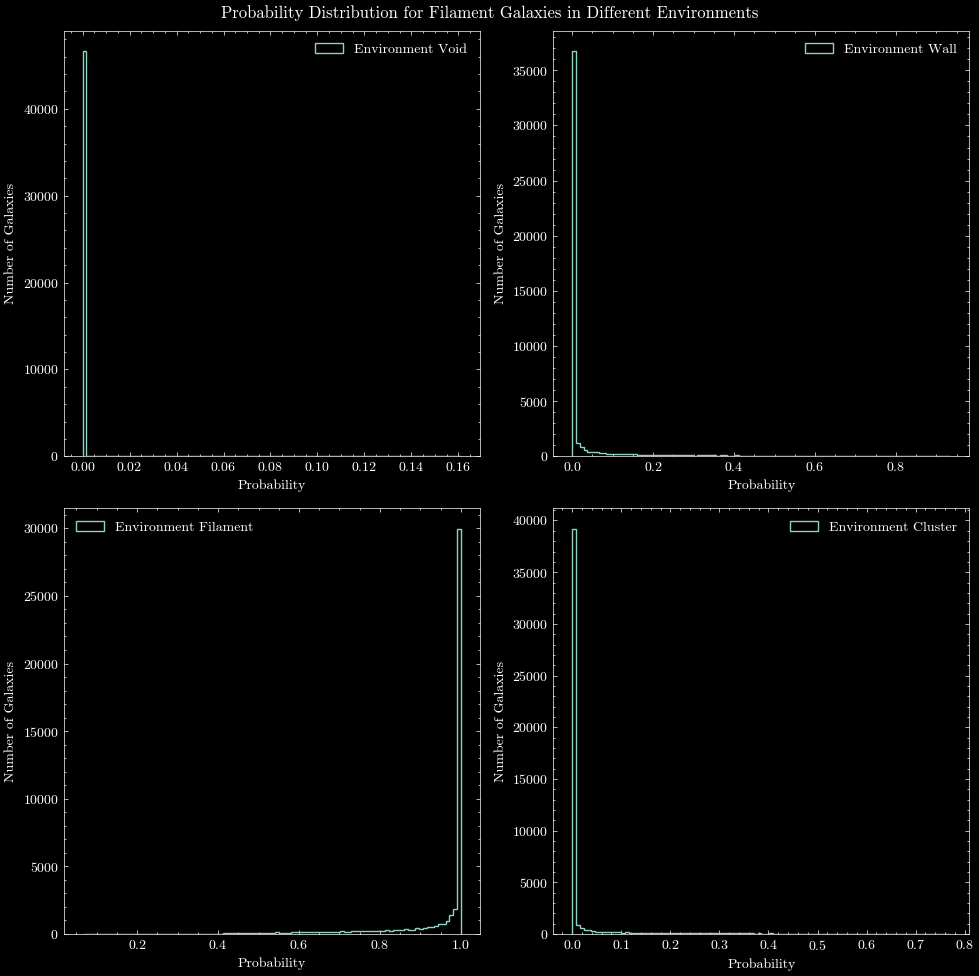

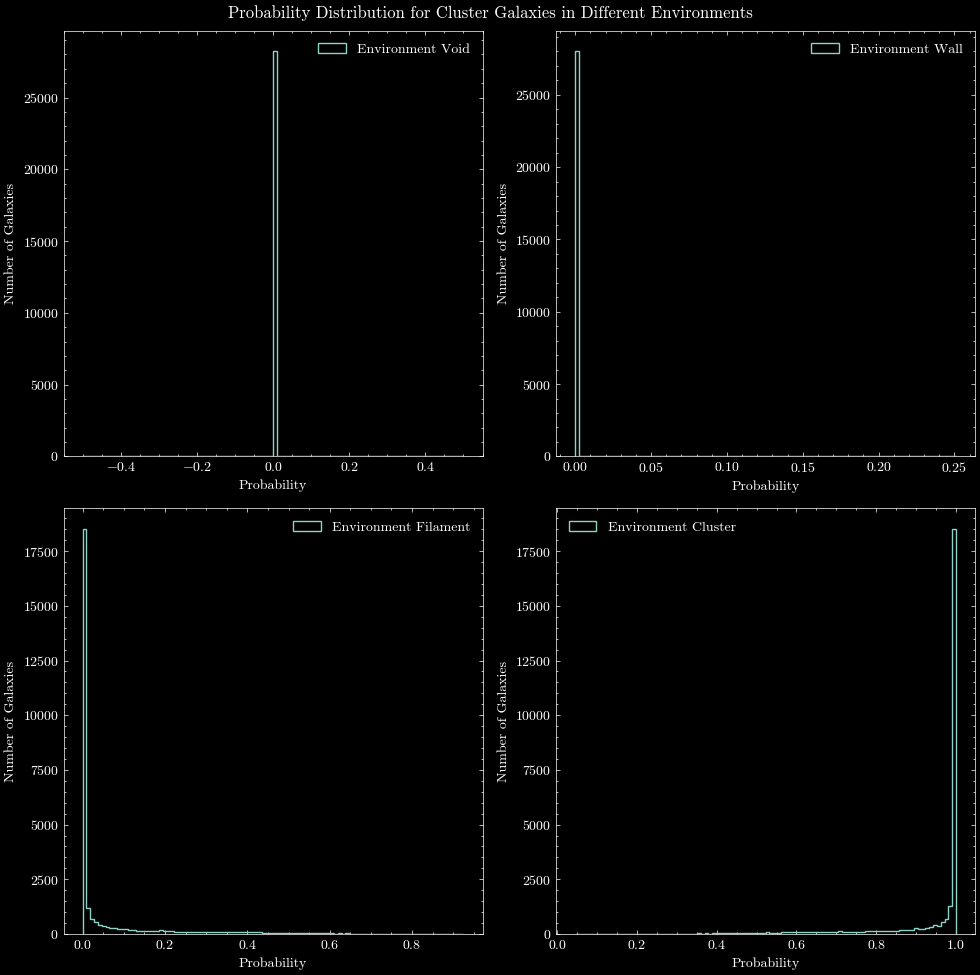

In [162]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Void Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Wall Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Filament Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Cluster Galaxies in Different Environments')
fig.tight_layout()
plt.show()


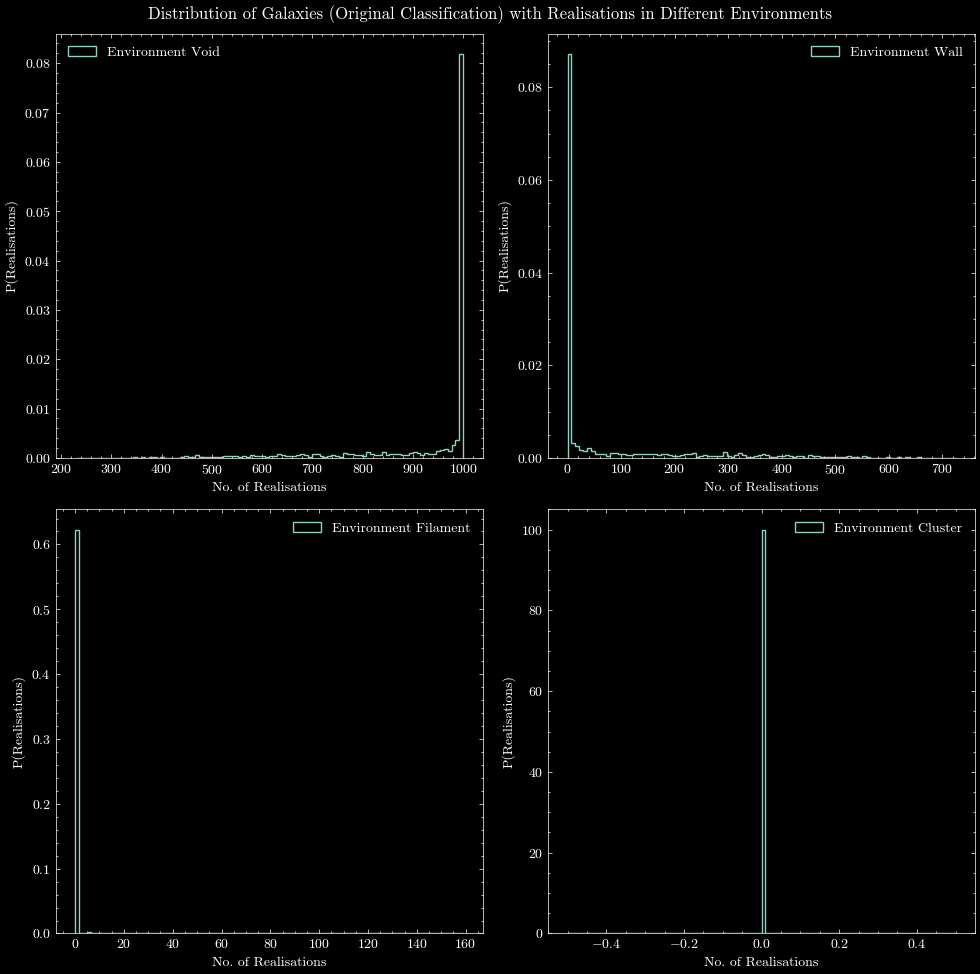

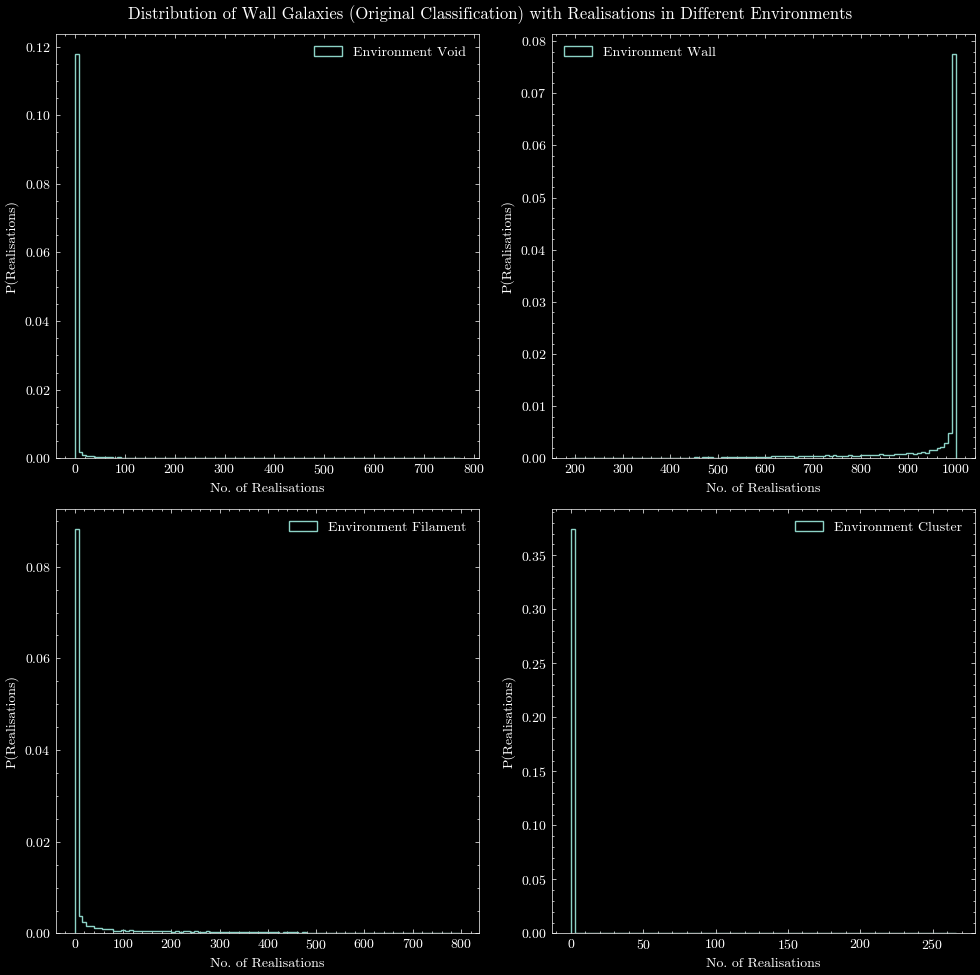

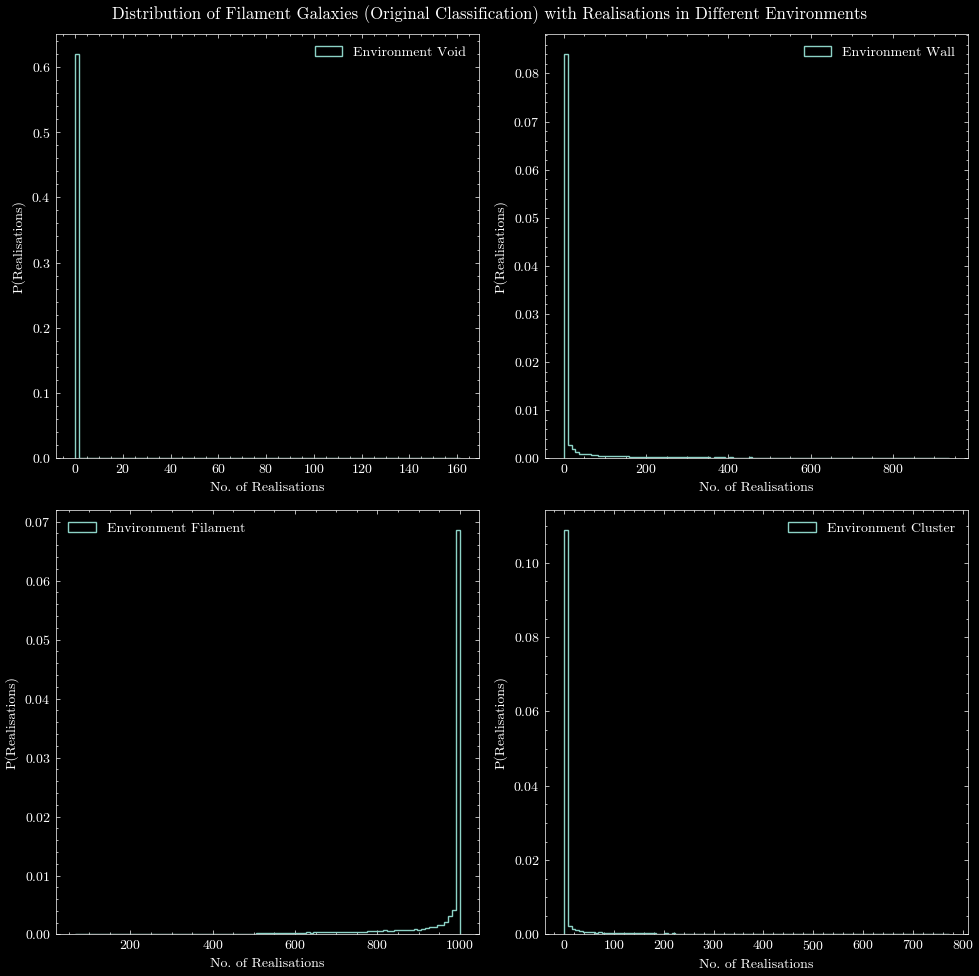

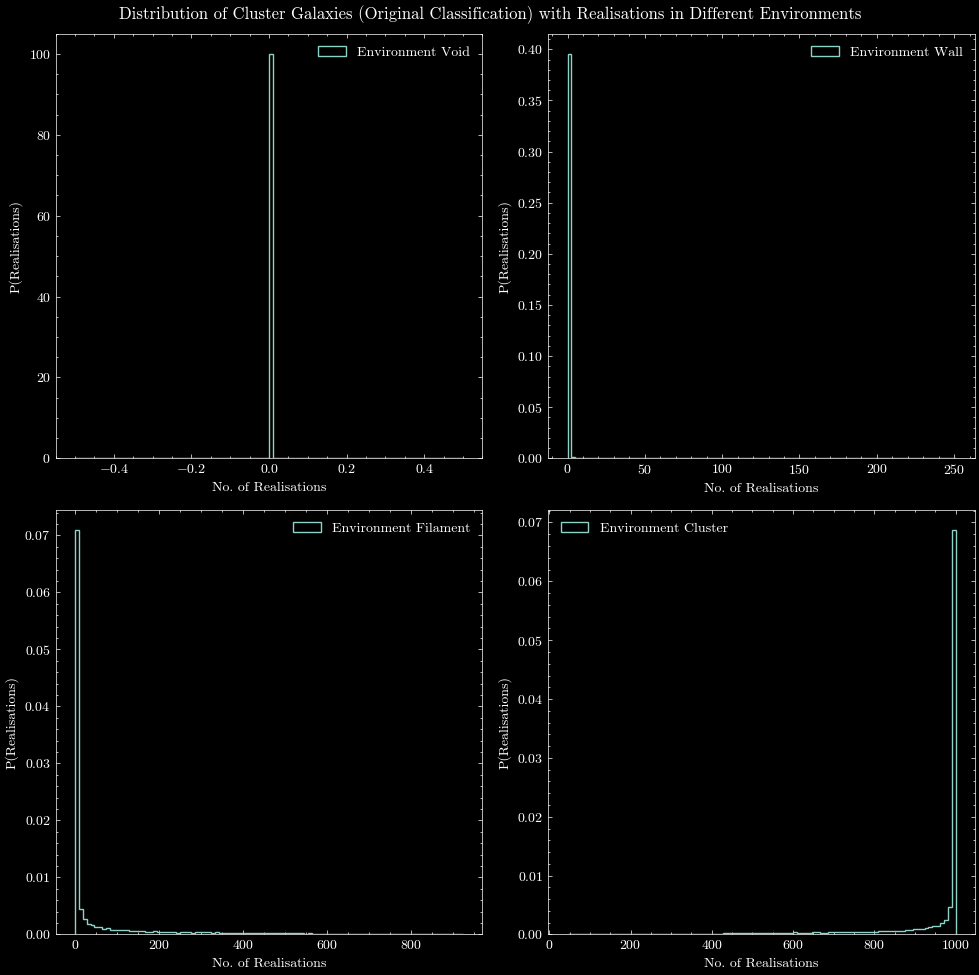

In [163]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Wall Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Filament Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Cluster Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()


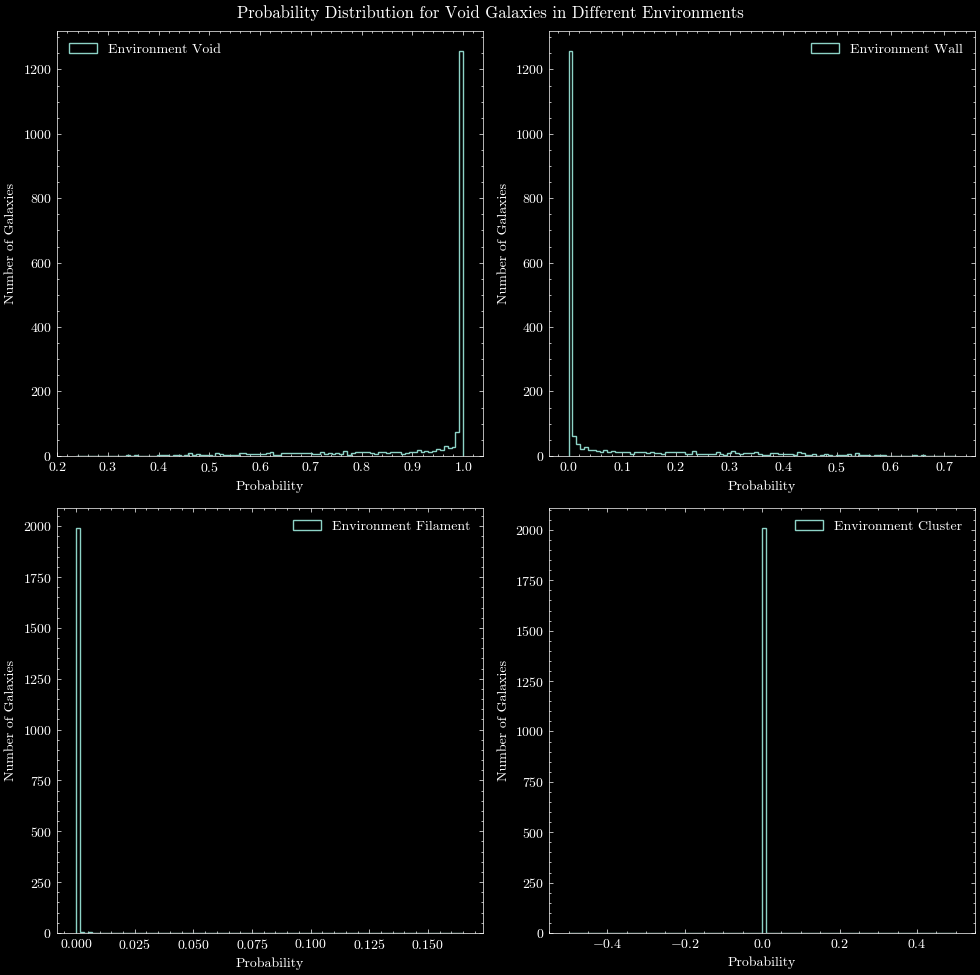

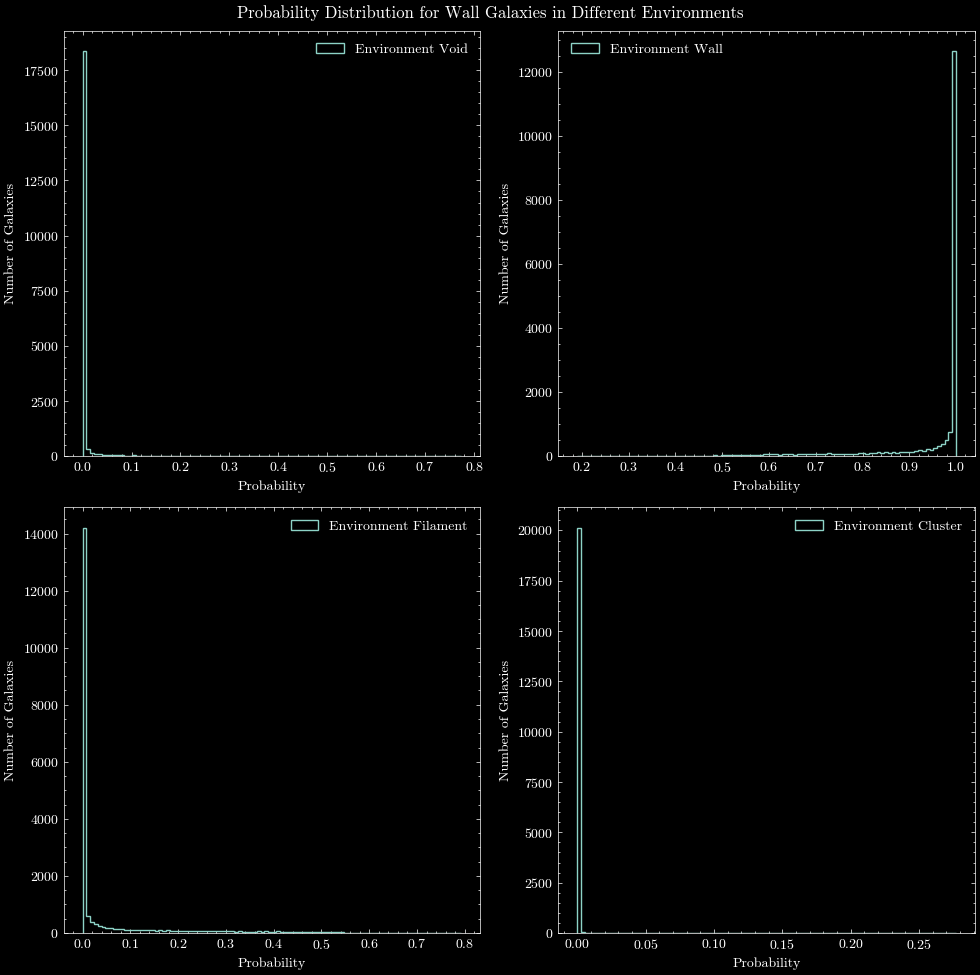

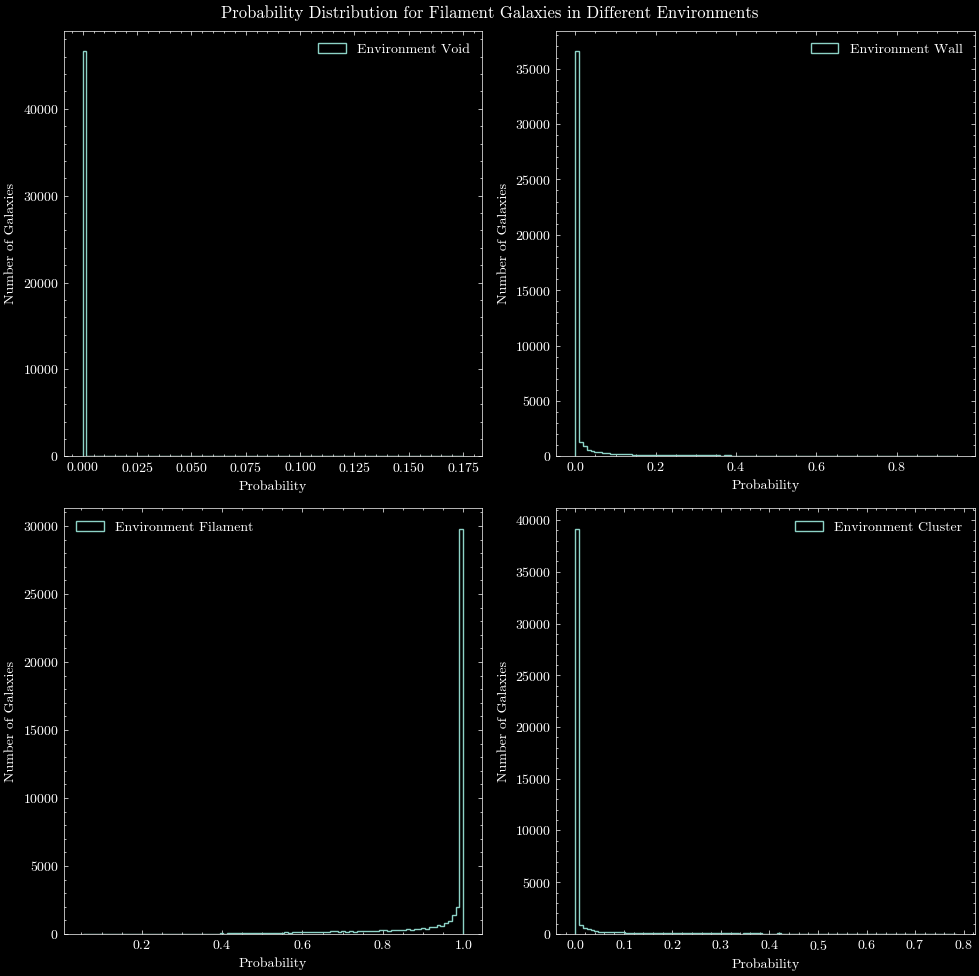

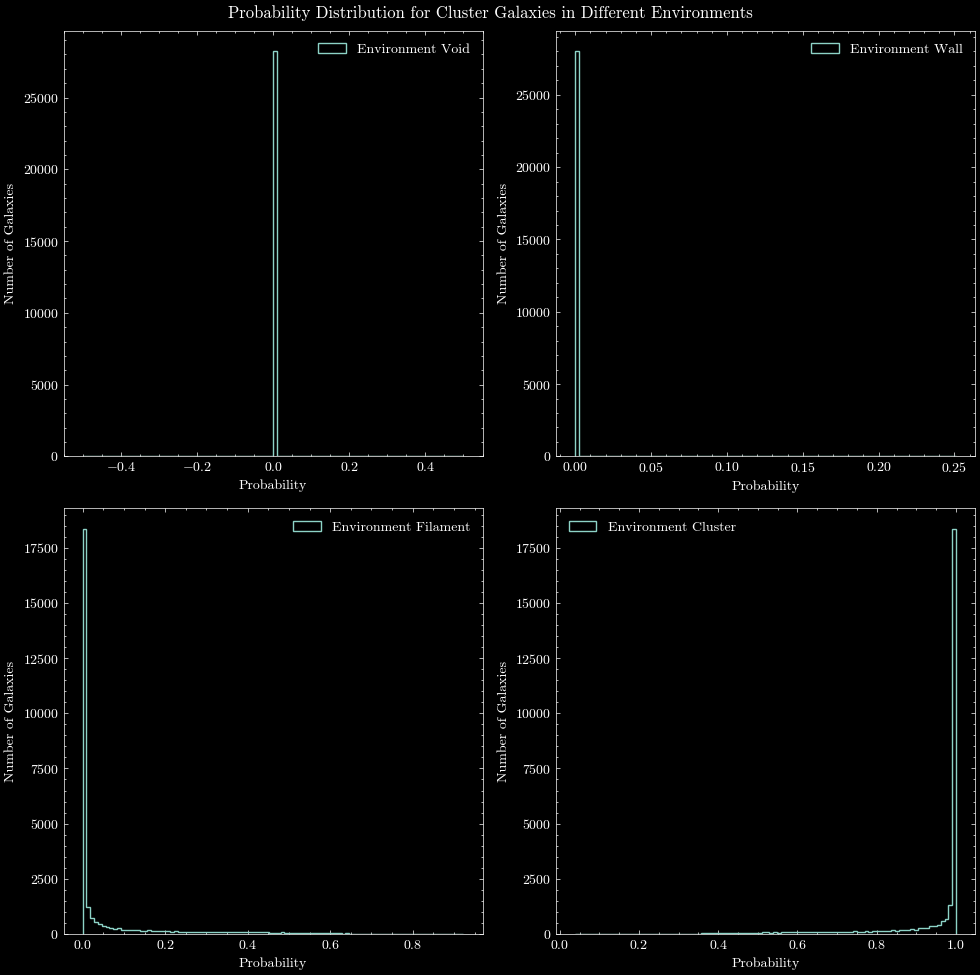

In [164]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Void Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Wall Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Filament Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Cluster Galaxies in Different Environments')
fig.tight_layout()
plt.show()


In [165]:

voids = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 0.0]
walls = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 1.0]
filaments = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 2.0]
clusters = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 3.0]
print('Target=0:',len(voids))
print('Target=1:',len(walls))
print('Target=2:',len(filaments))
print('Target=3:',len(clusters))
print(len(shifted_galaxies_probstab))

Target=0: 2009
Target=1: 20242
Target=2: 46746
Target=3: 28236
97233


In [166]:
print('No. of not near boundary 0:',len(voids[voids[0] >= 0.95])/len(voids))
print('No. of not near boundary 1:',len(walls[walls[1] >= 0.95])/len(walls))
print('No. of not near boundary 2:',len(filaments[filaments[2] >= 0.95])/len(filaments))
print('No. of not near boundary 3:',len(clusters[clusters[3] >= 0.95])/len(clusters))

No. of not near boundary 0: 0.7227476356396217
No. of not near boundary 1: 0.7402430589862662
No. of not near boundary 2: 0.7525135840499722
No. of not near boundary 3: 0.761828870944893


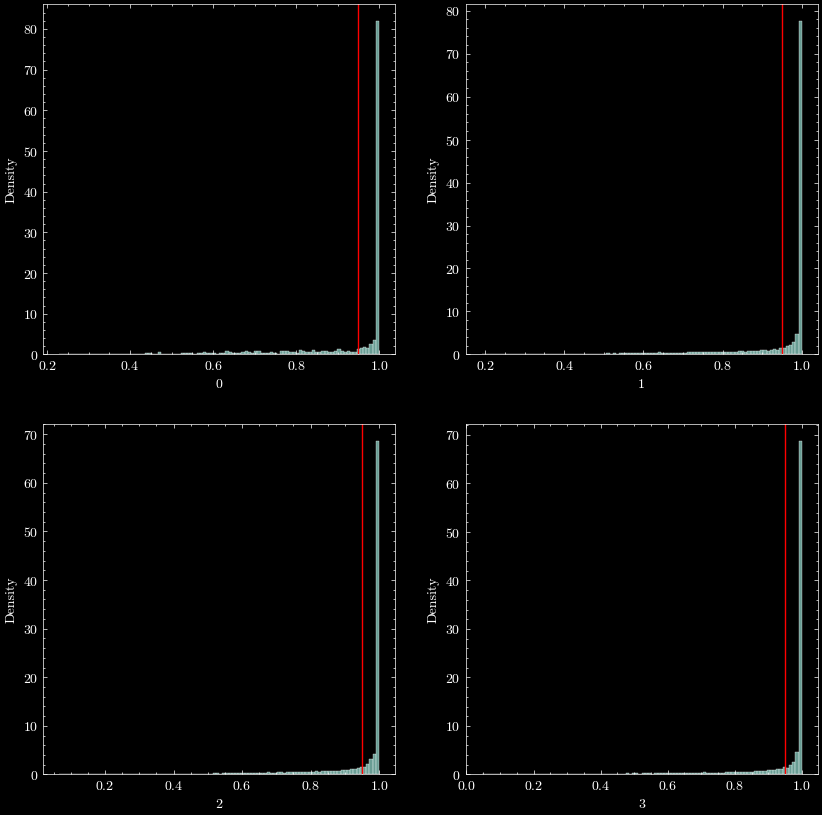

In [167]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=voids[0], bins=100, ax=ax[0, 0], stat='density')
sns.histplot(data=walls[1], bins=100, ax=ax[0, 1], stat='density')
sns.histplot(data=filaments[2], bins=100, ax=ax[1, 0], stat='density')
sns.histplot(data=clusters[3], bins=100, ax=ax[1, 1], stat='density')
ax[0,0].axvline(0.95, color='red')
ax[0,1].axvline(0.95, color='red')
ax[1,0].axvline(0.95, color='red')
ax[1,1].axvline(0.95, color='red')

In [168]:
hcon_voids = np.array(voids[voids[0] >= 0.95].index)
hcon_walls = np.array(walls[walls[1] >= 0.95].index)
hcon_filaments = np.array(filaments[filaments[2] >= 0.95].index)
hcon_clusters = np.array(clusters[clusters[3] >= 0.95].index)

In [169]:
preds

Labels  Predictions
Galaxy Index                     
78744              1            1
64869              1            0
69336              2            1
31965              2            2
53078              2            2
...              ...          ...
88912              1            2
81499              3            2
9206               3            3
73243              1            1
39667              2            2

[15701 rows x 2 columns]

In [170]:
# filter preds to only include high confidence galaxies, ignore if not in high confidence list
hcon_preds = preds[preds.index.isin(hcon_voids) | preds.index.isin(hcon_walls) | preds.index.isin(hcon_filaments) | preds.index.isin(hcon_clusters)]
hcon_preds

Labels  Predictions
Galaxy Index                     
78744              1            1
64869              1            0
69336              2            1
31965              2            2
19241              3            3
...              ...          ...
22586              3            2
88912              1            2
9206               3            3
73243              1            1
39667              2            2

[11863 rows x 2 columns]

In [171]:
# accuracy of high confidence galaxies and all galaxies
accuracy_hcon = (hcon_preds['Labels'] == hcon_preds['Predictions']).sum() / len(hcon_preds)
accuracy_full = (preds['Labels'] == preds['Predictions']).sum() / len(preds)
print('Accuracy of all galaxies {:.2f} and >95% confidence galaxies {:.2f}'.format(accuracy_full*100, accuracy_hcon*100))

Accuracy of all galaxies 68.79 and >95% confidence galaxies 73.30


In [172]:
cm_hcon = confusion_matrix(hcon_preds['Labels'], hcon_preds['Predictions'])
cm_all = confusion_matrix(preds['Labels'], preds['Predictions'])

Text(0.5, 1.0, 'High Confidence Galaxies (11863)')

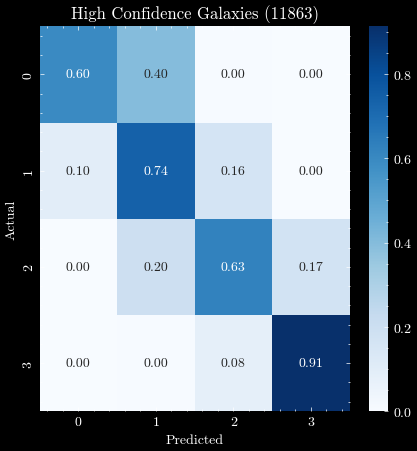

In [188]:
# confusion matrix of high confidence galaxies
cm_hcon = confusion_matrix(hcon_preds['Labels'], hcon_preds['Predictions'])
cm_hcon = cm_hcon.astype('float') / cm_hcon.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_hcon, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'High Confidence Galaxies ({len(hcon_preds)})')


Text(0.5, 1.0, 'High Confidence Galaxies (12328)')

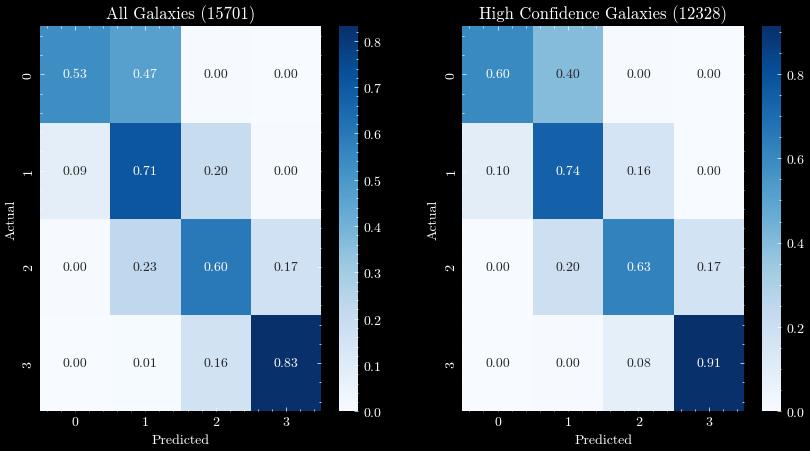

In [189]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
cm_pure = cm_hcon.astype('float') / cm_pure.sum(axis=1)[:, np.newaxis]
cm_full = cm_all.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_full, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
sns.heatmap(cm_pure, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
l1=len(merged['Labels'])
l2=len(pure['Labels'])
ax1.set_title(f'All Galaxies ({l1})')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'High Confidence Galaxies ({l2})')

In [175]:
x = x.to('Mpc')
y = y.to('Mpc')
z = z.to('Mpc')

In [176]:
plt.style.use('dark_background')

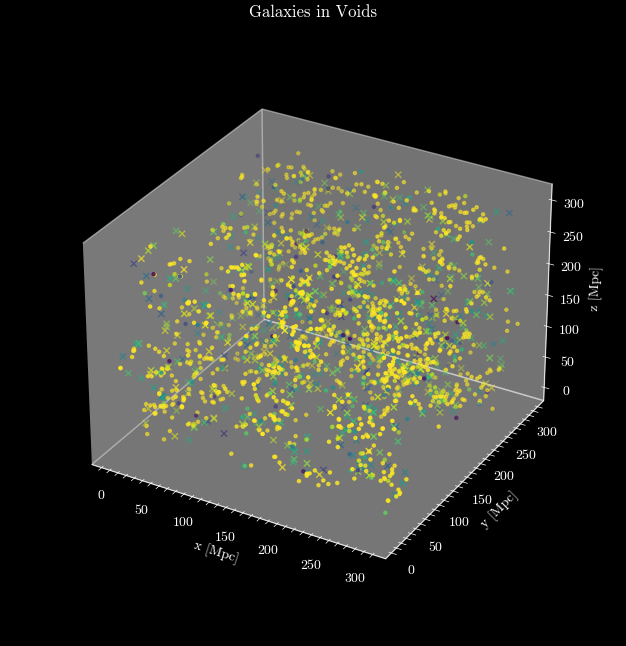

In [177]:
# let's look at where these galaxies are located in the simulation by using x y z and colouring by the strength of 0,1,2,3. no grid
env = voids[voids[0] >= 0.95]
lconfenv = voids[voids[0] < 0.95]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
hconfvoidvis = ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), z[list(env.index)].to('Mpc'), c=env[0], cmap='viridis', label='>95% Void', marker='.')
lconfvoidvis = ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), z[list(lconfenv.index)].to('Mpc'), c=lconfenv[0], cmap='viridis', label='<95% Void', marker='x')
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')

ax.set_title('Galaxies in Voids')
ax.set_box_aspect(None, zoom=0.85)
ax.grid(False)
plt.show()

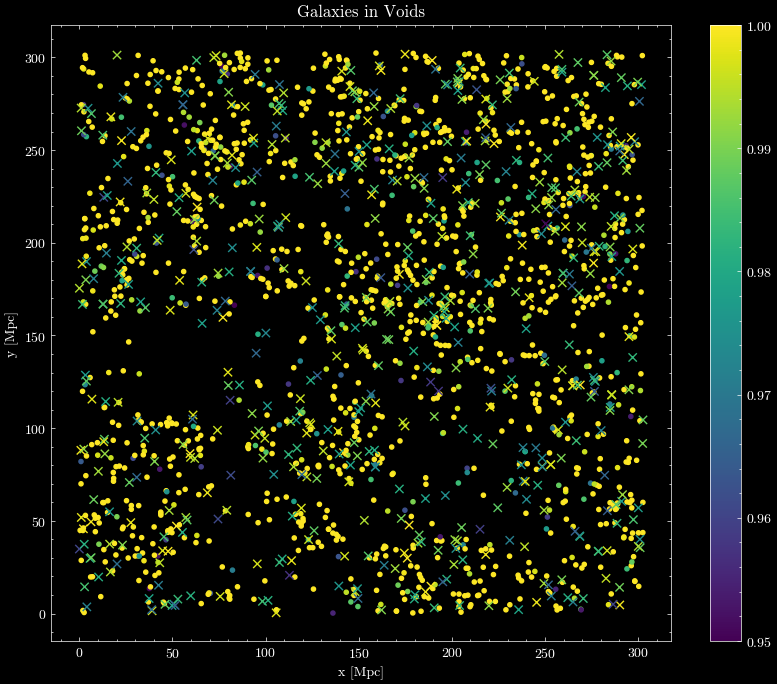

In [178]:
# let's look at where these galaxies are located in the simulation by using x y z and colouring by the strength of 0,1,2,3. no grid
env = voids[voids[0] >= 0.95]
lconfenv = voids[voids[0] < 0.95]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
hconfvoidvis = ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), c=env[0], cmap='viridis', label='Void', marker='.')
lconfvoidvis = ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), c=lconfenv[0], cmap='viridis', label='Void', marker='x')
fig.colorbar(hconfvoidvis)
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_title('Galaxies in Voids')
ax.grid(False)
plt.show()

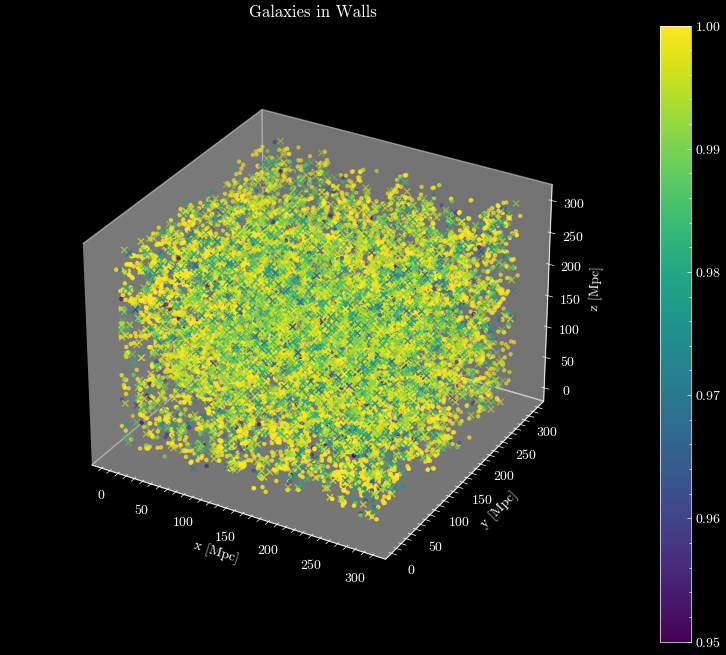

In [179]:
env = walls[walls[1] >= 0.95]
lconfenv = walls[walls[1] < 0.95]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
wallvis = ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), z[list(env.index)].to('Mpc'), c=env[1], cmap='viridis', label='Void', marker='.')
lconfwallvis = ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), z[list(lconfenv.index)].to('Mpc'), c=lconfenv[1], cmap='viridis', label='Void', marker='x')
fig.colorbar(wallvis)
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
ax.set_title('Galaxies in Walls')
ax.set_box_aspect(None, zoom=0.85)
ax.grid(False)
plt.show()

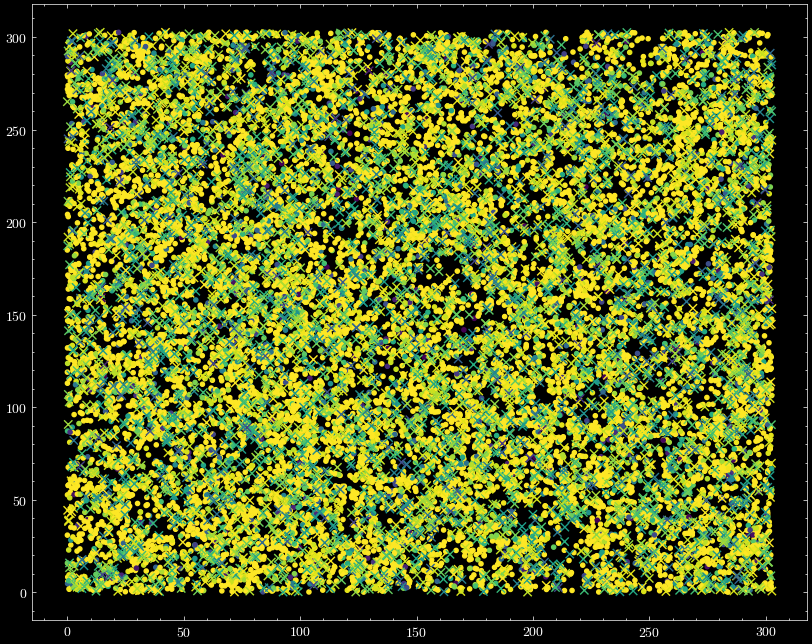

In [180]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), c=env[1], cmap='viridis', label='Wall', marker='.')
ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), c=lconfenv[1], cmap='viridis', label='Wall', marker='x')

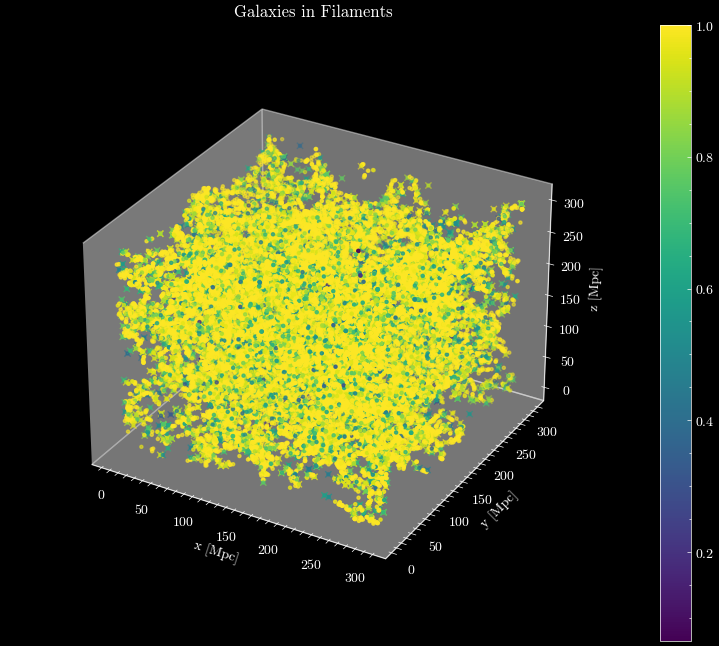

In [181]:
env = filaments
lconfenv = filaments[filaments[2] < 0.95]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
filamentvis = ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), z[list(env.index)].to('Mpc'), c=env[2], cmap='viridis', label='Void', marker='.')
lconffilamentvis = ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), z[list(lconfenv.index)].to('Mpc'), c=lconfenv[2], cmap='viridis', label='Void', marker='x')
fig.colorbar(filamentvis)
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
ax.set_title('Galaxies in Filaments')
ax.set_box_aspect(None, zoom=0.85)
ax.grid(False)
plt.show()

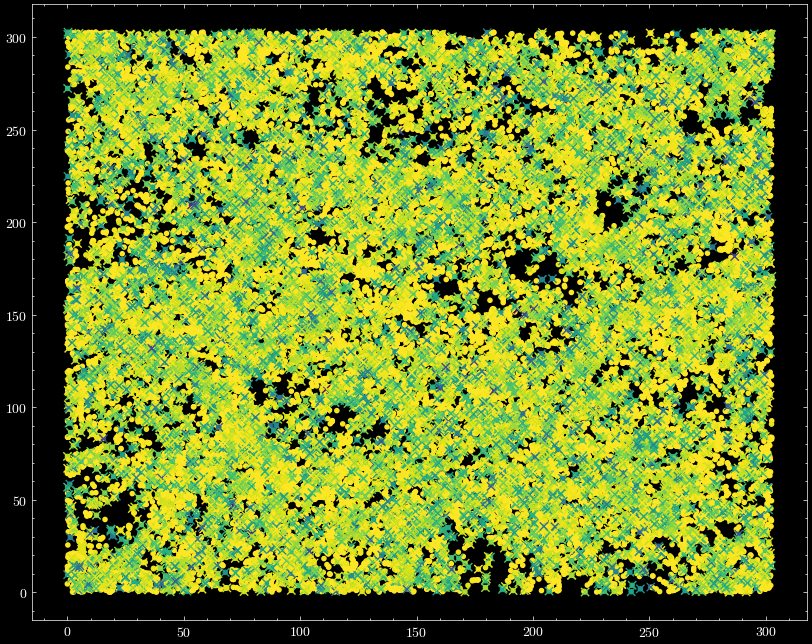

In [182]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), c=env[2], cmap='viridis', label='Filament', marker='.')
ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), c=lconfenv[2], cmap='viridis', label='Filament', marker='x')

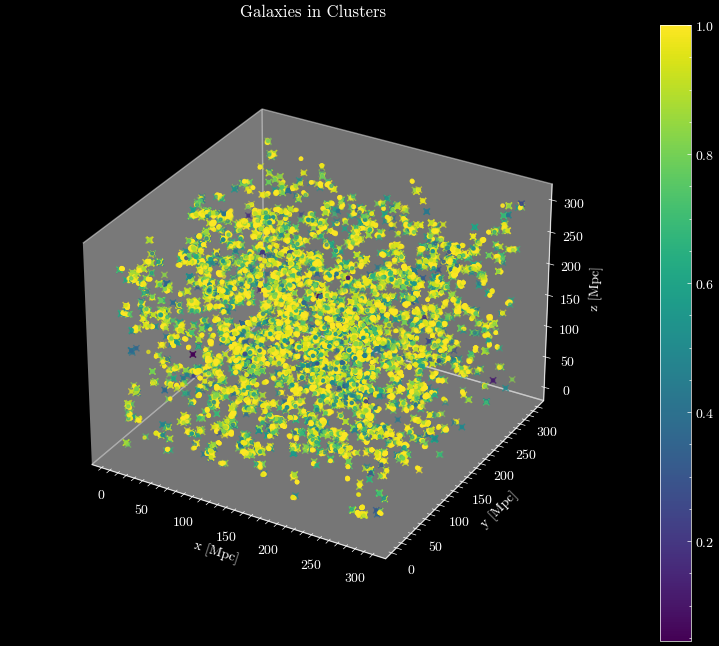

In [183]:
env = clusters
lconfenv = clusters[clusters[3] < 0.95]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
clustervis = ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), z[list(env.index)].to('Mpc'), c=env[3], cmap='viridis', label='Void', marker='.')
lconfclustervis = ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), z[list(lconfenv.index)].to('Mpc'), c=lconfenv[3], cmap='viridis', label='Void', marker='x')
fig.colorbar(clustervis)
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
ax.set_title('Galaxies in Clusters')
ax.set_box_aspect(None, zoom=0.85)
ax.grid(False)
plt.show()

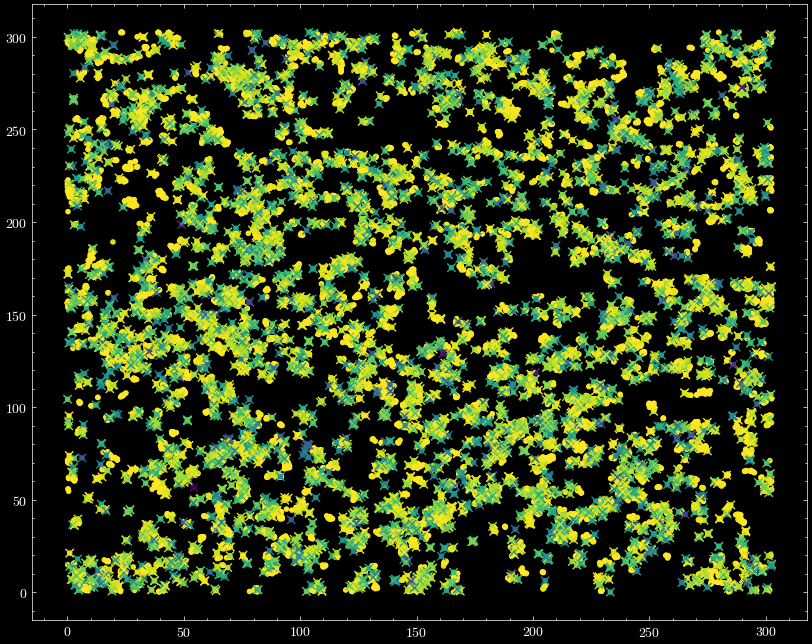

In [184]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x[list(env.index)].to('Mpc'), y[list(env.index)].to('Mpc'), c=env[3], cmap='viridis', label='Cluster', marker='.')
ax.scatter(x[list(lconfenv.index)].to('Mpc'), y[list(lconfenv.index)].to('Mpc'), c=lconfenv[3], cmap='viridis', label='Cluster', marker='x')

In [185]:
import plotly.io as pio
pio.renderers.default = "browser"

In [186]:
import plotly.graph_objects as go
import plotly.express as px

hconfvoids = voids[voids[0] >= 0.95]
hconfwalls = walls[walls[1] >= 0.95]
hconffilaments = filaments[filaments[2] >= 0.95]
hconfclusters = clusters[clusters[3] >= 0.95]

lconfvoids = voids[voids[0] < 0.95]
lconfwalls = walls[walls[1] < 0.95]
lconffilaments = filaments[filaments[2] < 0.95]
lconfclusters = clusters[clusters[3] < 0.95]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=x[list(hconfvoids.index)], y=y[list(hconfvoids.index)], z=z[list(hconfvoids.index)], mode='markers', name = '>95% Voids', marker_symbol= 'circle', marker=dict(size=2, color=px.colors.sequential.Plasma_r[0])))
fig.add_trace(go.Scatter3d(x=x[list(lconfvoids.index)], y=y[list(lconfvoids.index)], z=z[list(lconfvoids.index)], mode='markers', name = '<95% Voids', marker_symbol= 'x', marker=dict(size=2, color=px.colors.sequential.Plasma_r[1])))
fig.add_trace(go.Scatter3d(x=x[list(hconfwalls.index)], y=y[list(hconfwalls.index)], z=z[list(hconfwalls.index)], mode='markers', name = '>95% Walls', marker_symbol= 'circle', marker=dict(size=2, color=px.colors.sequential.Plasma_r[2])))
fig.add_trace(go.Scatter3d(x=x[list(lconfwalls.index)], y=y[list(lconfwalls.index)], z=z[list(lconfwalls.index)], mode='markers', name = '<95% Walls', marker_symbol= 'x', marker=dict(size=2, color=px.colors.sequential.Plasma_r[3])))
fig.add_trace(go.Scatter3d(x=x[list(hconffilaments.index)], y=y[list(hconffilaments.index)], z=z[list(hconffilaments.index)], mode='markers', name = '>95% Filaments', marker_symbol='circle', marker=dict(size=2, color=px.colors.sequential.Plasma_r[4])))
fig.add_trace(go.Scatter3d(x=x[list(lconffilaments.index)], y=y[list(lconffilaments.index)], z=z[list(lconffilaments.index)], mode='markers', name = '<95% Filaments', marker_symbol='x', marker=dict(size=2, color=px.colors.sequential.Plasma_r[5])))
fig.add_trace(go.Scatter3d(x=x[list(hconfclusters.index)], y=y[list(hconfclusters.index)], z=z[list(hconfclusters.index)], mode='markers', name = '>95% Clusters', marker_symbol='circle', marker=dict(size=2, color=px.colors.sequential.Plasma_r[6])))
fig.add_trace(go.Scatter3d(x=x[list(lconfclusters.index)], y=y[list(lconfclusters.index)], z=z[list(lconfclusters.index)], mode='markers', name = '<95% Clusters', marker_symbol='x', marker=dict(size=2, color=px.colors.sequential.Plasma_r[7])))
fig.update_layout(template='plotly_dark')
	
fig.show()

In [187]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=x[list(hconfvoids.index)], y=y[list(hconfvoids.index)], z=z[list(hconfvoids.index)], mode='markers', name = '>95% Voids', marker_symbol= 'circle', marker=dict(size=2, color='red')))
fig.add_trace(go.Scatter3d(x=x[list(lconfvoids.index)], y=y[list(lconfvoids.index)], z=z[list(lconfvoids.index)], mode='markers', name = '<95% Voids', marker_symbol= 'x', marker=dict(size=2, color='red')))
fig.add_trace(go.Scatter3d(x=x[list(hconfwalls.index)], y=y[list(hconfwalls.index)], z=z[list(hconfwalls.index)], mode='markers', name = '>95% Walls', marker_symbol= 'circle', marker=dict(size=2, color='green')))
fig.add_trace(go.Scatter3d(x=x[list(lconfwalls.index)], y=y[list(lconfwalls.index)], z=z[list(lconfwalls.index)], mode='markers', name = '<95% Walls', marker_symbol= 'x', marker=dict(size=2, color='green')))
fig.add_trace(go.Scatter3d(x=x[list(hconffilaments.index)], y=y[list(hconffilaments.index)], z=z[list(hconffilaments.index)], mode='markers', name = '>95% Filaments', marker_symbol='circle', marker=dict(size=2, color='pink')))
fig.add_trace(go.Scatter3d(x=x[list(lconffilaments.index)], y=y[list(lconffilaments.index)], z=z[list(lconffilaments.index)], mode='markers', name = '<95% Filaments', marker_symbol='x', marker=dict(size=2, color='pink')))
fig.add_trace(go.Scatter3d(x=x[list(hconfclusters.index)], y=y[list(hconfclusters.index)], z=z[list(hconfclusters.index)], mode='markers', name = '>95% Clusters', marker_symbol='circle', marker=dict(size=2, color='yellow')))
fig.add_trace(go.Scatter3d(x=x[list(lconfclusters.index)], y=y[list(lconfclusters.index)], z=z[list(lconfclusters.index)], mode='markers', name = '<95% Clusters', marker_symbol='x', marker=dict(size=2, color='yellow')))
fig.update_layout(template='plotly_dark')
	
fig.show()